<a href="https://colab.research.google.com/github/khangdltUIT/CS115_Mathematics_cs/blob/main/ML_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án cuối kì
# Dùng SVM phân biệt mức độ của bệnh nhân ung thư vú ( Binary Classification )
* GVHD: TS. Lê Minh Hưng
* Nhóm:
1. Dương Lê Tường Khang 18520882
2. Bùi Đào Gia Huy 18520818
3. Lã Trường Hải 18520698

# Download Dataset from Drive
Link dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/REPORT/Course Project/Mathematics for CS/breast_cancer_wisconsin.csv' '/content/breast_cancer_wisconsin.csv'

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

%matplotlib inline
sns.set_style('whitegrid')

#Analysis Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/breast_cancer_wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Features are used in datset:


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.info

<bound method DataFrame.info of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

## Feature extraction:
* X là các thuộc tính được định nghĩa trong feature_name
* Nhãn dự đoán Y sẽ là cột diagnosis:
    * B: nhẹ
    * M: cấp tính

In [ ]:
features_name = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
X = df[features_name]
Y = df['diagnosis']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


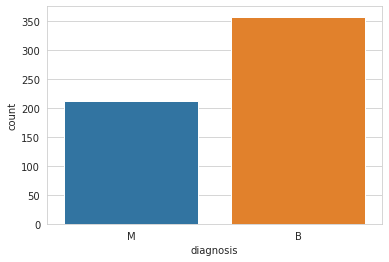

In [ ]:
sns.countplot(Y, label = "Count")

## Chia dữ liệu:
Chia dữ liệu thành 2 tập theo tỉ lệ 8:2 tương ứng.
* Train set (455 mẫu)
* Test set  (114 mẫu)

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = .2, random_state = 2020)

In [ ]:
print(len(train_X))
print(len(test_X))

455
114


# Define Model


In [ ]:

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Linear Kernle SVM
loss = hinge 

In [ ]:
model = LinearSVC(loss='hinge', dual=True)
model.fit(train_X, train_Y)

print_score(model, train_X, train_Y, test_X, test_Y, train=True)
print_score(model, train_X, train_Y, test_X, test_Y, train=False)

Train Result:
Accuracy Score: 91.87%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.891975    0.984733  0.918681    0.938354      0.925409
recall       0.993127    0.786585  0.918681    0.889856      0.918681
f1-score     0.939837    0.874576  0.918681    0.907207      0.916315
support    291.000000  164.000000  0.918681  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[289   2]
 [ 35 129]]

Test Result:
Accuracy Score: 92.11%
_______________________________________________
CLASSIFICATION REPORT:
                  B          M  accuracy   macro avg  weighted avg
precision   0.88000   1.000000  0.921053    0.940000      0.930526
recall      1.00000   0.812500  0.921053    0.906250      0.921053
f1-score    0.93617   0.896552  0.921053    0.916361      0.919489
support    66.00000  48.000000  0.921053  114.000000    114.000000
________

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Polynomial Kernel SVM

In [ ]:
# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(train_X, train_Y)

print_score(model, train_X, train_Y, test_X, test_Y, train=True)
print_score(model, train_X, train_Y, test_X, test_Y, train=False)

Train Result:
Accuracy Score: 97.58%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.976190    0.975155  0.975824    0.975673      0.975817
recall       0.986254    0.957317  0.975824    0.971786      0.975824
f1-score     0.981197    0.966154  0.975824    0.973675      0.975775
support    291.000000  164.000000  0.975824  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[287   4]
 [  7 157]]

Test Result:
Accuracy Score: 96.49%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.955882   0.978261  0.964912    0.967072      0.965305
recall      0.984848   0.937500  0.964912    0.961174      0.964912
f1-score    0.970149   0.957447  0.964912    0.963798      0.964801
support    66.000000  48.000000  0.964912  114.000000    114.000000
___

## Radial Kernel SVM

In [ ]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(train_X, train_Y)

print_score(model, train_X, train_Y, test_X, test_Y, train=True)
print_score(model, train_X, train_Y, test_X, test_Y, train=False)

Train Result:
Accuracy Score: 63.96%
_______________________________________________
CLASSIFICATION REPORT:
                    B      M  accuracy  macro avg  weighted avg
precision    0.639560    0.0   0.63956    0.31978      0.409038
recall       1.000000    0.0   0.63956    0.50000      0.639560
f1-score     0.780161    0.0   0.63956    0.39008      0.498960
support    291.000000  164.0   0.63956  455.00000    455.000000
_______________________________________________
Confusion Matrix: 
 [[291   0]
 [164   0]]

Test Result:
Accuracy Score: 57.89%
_______________________________________________
CLASSIFICATION REPORT:
                   B     M  accuracy   macro avg  weighted avg
precision   0.578947   0.0  0.578947    0.289474      0.335180
recall      1.000000   0.0  0.578947    0.500000      0.578947
f1-score    0.733333   0.0  0.578947    0.366667      0.424561
support    66.000000  48.0  0.578947  114.000000    114.000000
_______________________________________________
Confusion 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fine Tuning SVM model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5], 
              'gamma': [0.1, 0.01, 0.001], 
              'kernel': ['poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)
grid.fit(train_X, train_Y)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(train_X, train_Y)
print_score(svm_clf, train_X, train_Y, test_X, test_Y, train=True)
print_score(svm_clf, train_X, train_Y, test_X, test_Y, train=False)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


##Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X,train_Y)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    clf,
    out_file="/content/iris_tree.dot",
    feature_names = features_name,
    class_names= 'diagnosis',
    rounded=True,
    filled=True
 )

In [ ]:
!dot -Tpng iris_tree.dot -o iris_tree.png

In [ ]:
print_score(clf, train_X, train_Y, test_X, test_Y, train = True)
print_score(clf, train_X, train_Y, test_X, test_Y, train = False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               B      M  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    291.0  164.0       1.0      455.0         455.0
_______________________________________________
Confusion Matrix: 
 [[291   0]
 [  0 164]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.968750   0.920000  0.947368    0.944375      0.948224
recall      0.939394   0.958333  0.947368    0.948864      0.947368
f1-score    0.953846   0.938776  0.947368    0.946311      0.947501
support    66.000000  48.000000  0.947368  114.000000    114.000000
_______________________________________________
Confusion

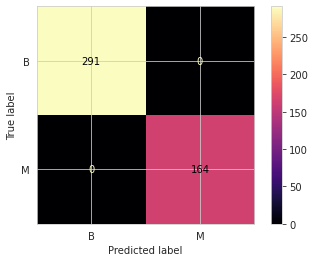

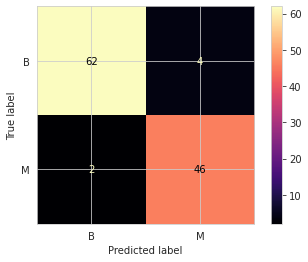

In [ ]:
plot_confusion_matrix(clf, train_X, train_Y ,cmap='magma', values_format = '.5g')
plot_confusion_matrix(clf, test_X, test_Y ,cmap='magma', values_format = '.5g')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(train_X,train_Y)

In [ ]:
print_score(gnb, train_X, train_Y, test_X, test_Y, train = True)
print_score(gnb, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 94.07%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.937086    0.947712  0.940659    0.942399      0.940916
recall       0.972509    0.884146  0.940659    0.928327      0.940659
f1-score     0.954469    0.914826  0.940659    0.934648      0.940180
support    291.000000  164.000000  0.940659  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[283   8]
 [ 19 145]]

Test Result:
Accuracy Score: 97.37%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.956522   1.000000  0.973684    0.978261      0.974828
recall      1.000000   0.937500  0.973684    0.968750      0.973684
f1-score    0.977778   0.967742  0.973684    0.972760      0.973552
support    66.000000  48.000000  0.973684  114.000000    114.000000
___

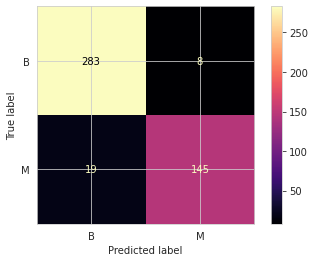

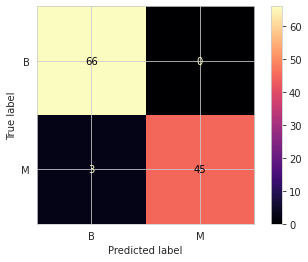

In [ ]:
plot_confusion_matrix(gnb, train_X, train_Y ,cmap='magma', values_format = '.5g')
plot_confusion_matrix(gnb, test_X, test_Y ,cmap='magma', values_format = '.5g')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier( n_neighbors=2 )
knn = knn.fit(train_X,train_Y)

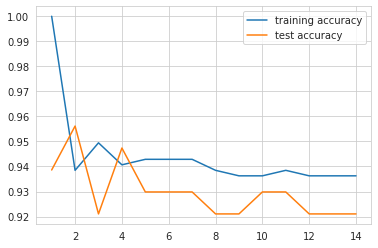

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_X, train_Y)
    # record training set accuracy
    training_accuracy.append(clf.score(train_X, train_Y))
    # record generalization accuracy
    test_accuracy.append(clf.score(test_X, test_Y))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()


In [ ]:
print_score(knn, train_X, train_Y, test_X, test_Y, train = True)
print_score(knn, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 93.85%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.912226    1.000000  0.938462    0.956113      0.943863
recall       1.000000    0.829268  0.938462    0.914634      0.938462
f1-score     0.954098    0.906667  0.938462    0.930383      0.937002
support    291.000000  164.000000  0.938462  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[291   0]
 [ 28 136]]

Test Result:
Accuracy Score: 95.61%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.929577   1.000000   0.95614    0.964789      0.959229
recall      1.000000   0.895833   0.95614    0.947917      0.956140
f1-score    0.963504   0.945055   0.95614    0.954279      0.955736
support    66.000000  48.000000   0.95614  114.000000    114.000000
___

1KNN

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix


In [ ]:
knn = KNeighborsClassifier( n_neighbors=1 )
knn = knn.fit(train_X,train_Y)
print_score(knn, train_X, train_Y, test_X, test_Y, train = True)
print_score(knn, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               B      M  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    257.0  141.0       1.0      398.0         398.0
_______________________________________________
Confusion Matrix: 
 [[257   0]
 [  0 141]]

Test Result:
Accuracy Score: 91.81%
_______________________________________________
CLASSIFICATION REPORT:
                    B          M  accuracy   macro avg  weighted avg
precision    0.913462   0.925373  0.918129    0.919417      0.918407
recall       0.950000   0.873239  0.918129    0.911620      0.918129
f1-score     0.931373   0.898551  0.918129    0.914962      0.917745
support    100.000000  71.000000  0.918129  171.000000    171.000000
_______________________________________________
Conf

2KNN


In [ ]:
knn = KNeighborsClassifier( n_neighbors=2 )
knn = knn.fit(train_X,train_Y)

print_score(knn, train_X, train_Y, test_X, test_Y, train = True)
print_score(knn, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 94.47%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.921147    1.000000  0.944724    0.960573      0.949082
recall       1.000000    0.843972  0.944724    0.921986      0.944724
f1-score     0.958955    0.915385  0.944724    0.937170      0.943519
support    257.000000  141.000000  0.944724  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[257   0]
 [ 22 119]]

Test Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                    B          M  accuracy   macro avg  weighted avg
precision    0.892857   1.000000  0.929825    0.946429      0.937343
recall       1.000000   0.830986  0.929825    0.915493      0.929825
f1-score     0.943396   0.907692  0.929825    0.925544      0.928572
support    100.000000  71.000000  0.929825  171.000000    171.00000

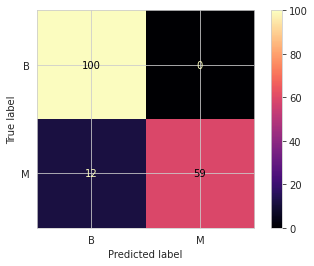

In [ ]:
plot_confusion_matrix(knn, test_X, test_Y ,cmap='magma', values_format = '.5g')

4KNN

In [ ]:
knn = KNeighborsClassifier( n_neighbors=4 )
knn = knn.fit(train_X,train_Y)

print_score(knn, train_X, train_Y, test_X, test_Y, train = True)
print_score(knn, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 94.47%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.936803    0.961240  0.944724    0.949022      0.945460
recall       0.980545    0.879433  0.944724    0.929989      0.944724
f1-score     0.958175    0.918519  0.944724    0.938347      0.944126
support    257.000000  141.000000  0.944724  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[252   5]
 [ 17 124]]

Test Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                    B          M  accuracy   macro avg  weighted avg
precision    0.915094   0.953846  0.929825    0.934470      0.931184
recall       0.970000   0.873239  0.929825    0.921620      0.929825
f1-score     0.941748   0.911765  0.929825    0.926756      0.929299
support    100.000000  71.000000  0.929825  171.000000    171.00000

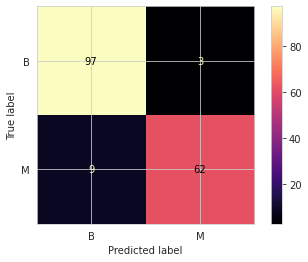

In [ ]:
plot_confusion_matrix(knn, test_X, test_Y ,cmap='magma', values_format = '.5g')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print_score(logisticRegr, train_X, train_Y, test_X, test_Y, train = True)
print_score(logisticRegr, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 95.16%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.946844    0.961039  0.951648    0.953941      0.951960
recall       0.979381    0.902439  0.951648    0.940910      0.951648
f1-score     0.962838    0.930818  0.951648    0.946828      0.951296
support    291.000000  164.000000  0.951648  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[285   6]
 [ 16 148]]

Test Result:
Accuracy Score: 97.37%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.970149   0.978723  0.973684    0.974436      0.973759
recall      0.984848   0.958333  0.973684    0.971591      0.973684
f1-score    0.977444   0.968421  0.973684    0.972932      0.973645
support    66.000000  48.000000  0.973684  114.000000    114.000000
___

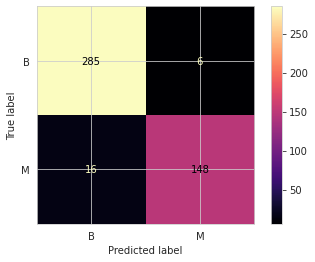

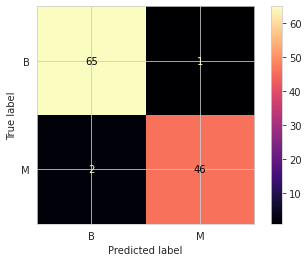

In [ ]:
plot_confusion_matrix(logisticRegr, train_X, train_Y ,cmap='magma', values_format = '.5g')
plot_confusion_matrix(logisticRegr, test_X, test_Y ,cmap='magma', values_format = '.5g')

## Voting Classified


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_svc = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model_tree = tree.DecisionTreeClassifier()
model_nb = GaussianNB()
model_knn = KNeighborsClassifier(n_neighbors=2)
model_log = LogisticRegression()

In [ ]:
voting_clf = VotingClassifier(
 estimators=[('lr', model_log), ('dt', model_tree), ('svc', model_svc), ('nb', model_nb), ('knn', model_knn)],
 voting='hard')
voting_clf.fit(train_X, train_Y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                  gamma=

In [ ]:
print_score(voting_clf, train_X, train_Y, test_X, test_Y, train = True)
print_score(voting_clf, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 97.58%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.963576    1.000000  0.975824    0.981788      0.976705
recall       1.000000    0.932927  0.975824    0.966463      0.975824
f1-score     0.981450    0.965300  0.975824    0.973375      0.975629
support    291.000000  164.000000  0.975824  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[291   0]
 [ 11 153]]

Test Result:
Accuracy Score: 99.12%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.985075   1.000000  0.991228    0.992537      0.991359
recall      1.000000   0.979167  0.991228    0.989583      0.991228
f1-score    0.992481   0.989474  0.991228    0.990977      0.991215
support    66.000000  48.000000  0.991228  114.000000    114.000000
___